## Stock prices prediction
The other objective of this project is to predict the future 25 day closing prices of tech companies by the daily opening, highest, lowest prices and volume. I would be predicting the relationship using a linear regression model and evaluate the performance of the model in predicting closing prices.

The first step is to import required packages

In [50]:
## IMPORT PACKAGES ##
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Then, I import the data generated from Tiingo daily reader in the stock-analysis.ipynb jupyter notebook.

In [51]:
df = pd.read_csv("tech-stock-data.csv")

## Part 1: GOOG

To predict closing prices of GOOG, I first prepare a separate data frame for GOOG data by extracting the relevant columns (`close`,`high`, `low`, `open`, `volume`). Following that, I added a new `target` column to include the closing prices of future 25 days. Lastly, I dropped the last 25 rows, as they have null values in the `target` column.

In [52]:
goog = df.loc[df['symbol'] == "GOOG"]

goog_df = goog[['close','high','low','open','volume']]

goog_df['target'] = goog_df['close'].shift(-25)

goog_df.dropna(axis=0,inplace=True)

goog_df.reset_index(inplace=True)

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_11533/1162702141.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goog_df['target'] = goog_df['close'].shift(-25)
/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_11533/1162702141.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goog_df.dropna(axis=0,inplace=True)


After preparing a data frame for GOOG data, I defined the predictor variables (`close`,`high`, `low`, `open`, `volume`) by naming them as `goog_x` and outcome variable (`target`) as goog_y. After that, I splitted the predictor variable and outcome dataframes, such that 80% of the data points go into the training dataframe and the remaining 20% go into the testing dataframe.

In [53]:
goog_x = goog_df.drop('target', axis=1).copy()
goog_y = goog_df['target'].copy()

# splitting the GOOG dataset into training and testing data sets
goog_x_train, goog_x_test, goog_y_train, goog_y_test  = train_test_split(goog_x, goog_y, test_size = 0.2)

I then inspect the number of rows and columns of the training and testing data sets.

In [54]:
# inspecting the number of rows and columns of the GOOG training and testing data sets
print("The shape of the training and testing data sets are as follows:\ngoog_x_train: {}\ngoog_x_test: {}\ngoog_y_train: {}\ngoog_y_test: {} \n".format(goog_x_train.shape, goog_x_test.shape, goog_y_train.shape, goog_y_test.shape))

print("There are {} rows and {} columns in the GOOG training data set.\nThere are {} rows and {} columns in the GOOG testing data set.".format(goog_y_train.shape[0], goog_x_train.shape[1], goog_y_test.shape[0], goog_x_test.shape[1]))

The shape of the training and testing data sets are as follows:
goog_x_train: (433, 6)
goog_x_test: (109, 6)
goog_y_train: (433,)
goog_y_test: (109,) 

There are 433 rows and 6 columns in the GOOG training data set.
There are 109 rows and 6 columns in the GOOG testing data set.


I built a linear regression model to predict the future 25 day closing prices in the training dataframe accotding to the predictor variables in the training dataframe (daily opening, highest, lowest prices and volume).

In [55]:
goog_model = LinearRegression()
goog_model.fit(goog_x_train, goog_y_train)

LinearRegression()

After building the model, the outcome variables in the testing dataframe was fitted to the linear regression model to predict the the future 25 day closing prices. 

In [56]:
goog_model_prediction = goog_model.predict(goog_x_test)
print("The actual verses predicted values of GOOG future 25 day closing prices:")
pd.DataFrame({'Actual values':np.array(goog_y_test), 'Predicted values':np.array(goog_model_prediction)})

The actual verses predicted values of GOOG future 25 day closing prices:


,Actual values,Predicted values
0,2551.70,2897.574090
1,1162.81,1335.404298
2,2356.09,2335.932334
3,2429.89,2178.603994
4,1626.03,1634.703090
...,...,...
104,2859.21,2844.935033
105,2690.42,2822.621744
106,2772.05,2809.232664
107,2932.52,2766.845267


R squared was used to evaluate the model performance in accurately predicting the GOOG future 25 day closing prices in the testing dataframe based on the predictor variables in the testing dataframe.

In [57]:
goog_model_r2 = abs(goog_model.score(goog_x_test,goog_y_test)*100)
print('The r^2 of the GOOG linear regression model is: ', goog_model_r2.round(2), '%')

The r^2 of the GOOG linear regression model is:  94.17 %


I then visualise the predictions versus actual closing prices.

Text(0.5, 1.0, 'Predicting GOOG closing prices with linear regression')

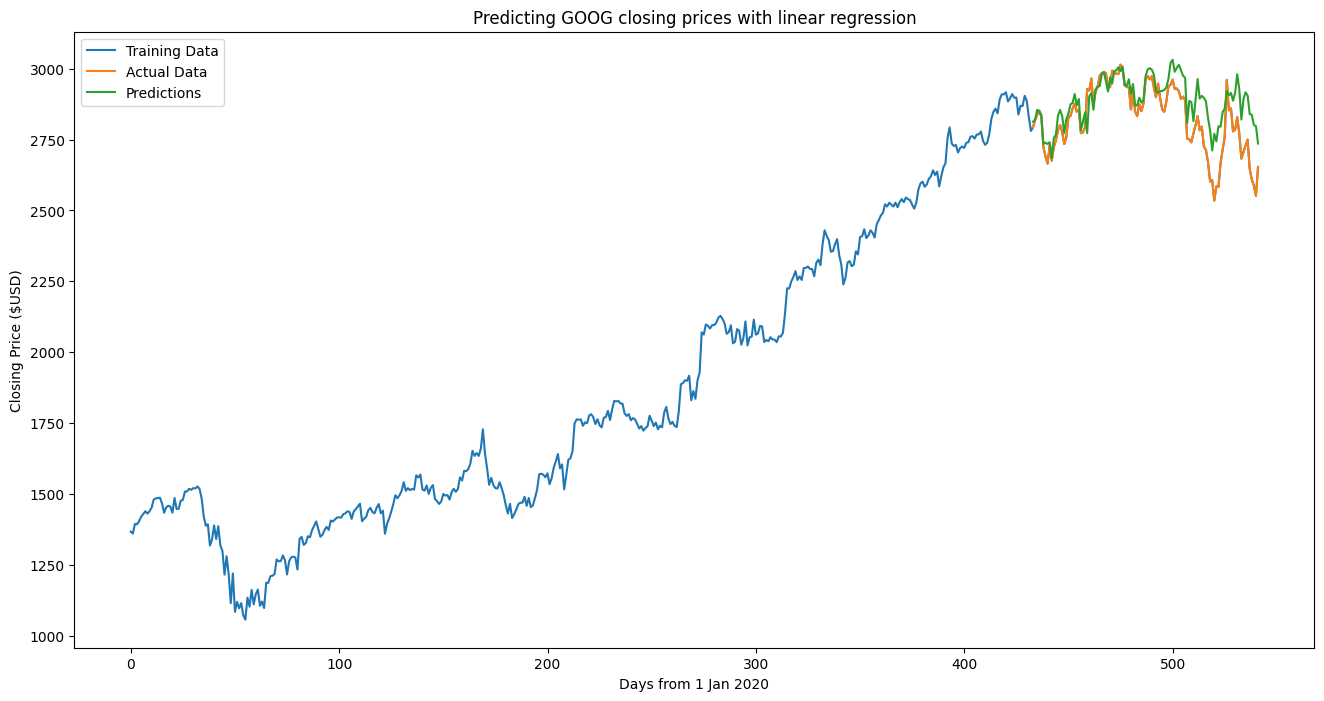

In [58]:
plt.figure(figsize=[16,8])

plt.plot(goog_df['close'])

goog_model_plot = goog_df[433:].copy()
goog_model_plot['predict'] = goog_model.predict(goog_model_plot.drop(columns = 'target'))
plt.plot(goog_model_plot[['close', 'predict']])

plt.legend(['Training Data', 'Actual Data', "Predictions"])
plt.xlabel('Days from 1 Jan 2020')
plt.ylabel('Closing Price ($USD)')
plt.title('Predicting GOOG closing prices with linear regression')

## Part 2: AMZN

In [59]:
# preparing the AMZN data set
amzn = df.loc[df['symbol'] == "AMZN"]

amzn_df = amzn[['close','high','low','open','volume']]

amzn_df['target'] = amzn_df['close'].shift(-25)

amzn_df.dropna(axis=0,inplace=True)

amzn_df.reset_index(inplace=True)

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_11533/1121689531.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn_df['target'] = amzn_df['close'].shift(-25)
/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_11533/1121689531.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn_df.dropna(axis=0,inplace=True)


In [60]:
# defining the predictor (x) and outcome (y) variables
amzn_x = amzn_df.drop('target', axis=1).copy()
amzn_y = amzn_df['target'].copy()

# splitting the AMZN dataset into training and testing data sets
amzn_x_train, amzn_x_test, amzn_y_train, amzn_y_test  = train_test_split(amzn_x, amzn_y, test_size = 0.2)

# inspecting the number of rows and columns of the AMZN training and testing data sets
print("The shape of the training and testing data sets are as follows:\namzn_x_train: {}\namzn_x_test: {}\namzn_y_train: {}\namzn_y_test: {} \n".format(amzn_x_train.shape, amzn_x_test.shape, amzn_y_train.shape, amzn_y_test.shape))

print("There are {} rows and {} columns in the AMZN training data set.\nThere are {} rows and {} columns in the AMZN testing data set.".format(amzn_y_train.shape[0], amzn_x_train.shape[1], amzn_y_test.shape[0], amzn_x_test.shape[1]))

The shape of the training and testing data sets are as follows:
amzn_x_train: (433, 6)
amzn_x_test: (109, 6)
amzn_y_train: (433,)
amzn_y_test: (109,) 

There are 433 rows and 6 columns in the AMZN training data set.
There are 109 rows and 6 columns in the AMZN testing data set.


In [61]:
# building the AMZN linear regression model
amzn_model = LinearRegression()
amzn_model.fit(amzn_x_train, amzn_y_train)

# predicting future AMZN closing prices based on the model
amzn_model_prediction = amzn_model.predict(amzn_x_test)
print("The actual verses predicted values of AMZN future 25 day closing prices:")
pd.DataFrame({'Actual values':np.array(amzn_y_test), 'Predicted values':np.array(amzn_model_prediction)})


The actual verses predicted values of AMZN future 25 day closing prices:


,Actual values,Predicted values
0,3225.00,2940.214260
1,2776.91,3382.525176
2,3303.50,3604.621277
3,3162.16,3214.692990
4,3207.04,3016.368175
...,...,...
104,3573.19,3353.992041
105,3265.08,3428.634927
106,3415.25,3226.612306
107,3322.94,3246.595839


In [62]:
# evaluating the AMZN linear regression model performance
amzn_model_r2 = abs(amzn_model.score(amzn_x_test,amzn_y_test)*100)
print('The r^2 of the AMZN linear regression model is: ', amzn_model_r2.round(2), '%')

The r^2 of the AMZN linear regression model is:  67.79 %


Text(0.5, 1.0, 'Predicting AMZN closing prices with linear regression')

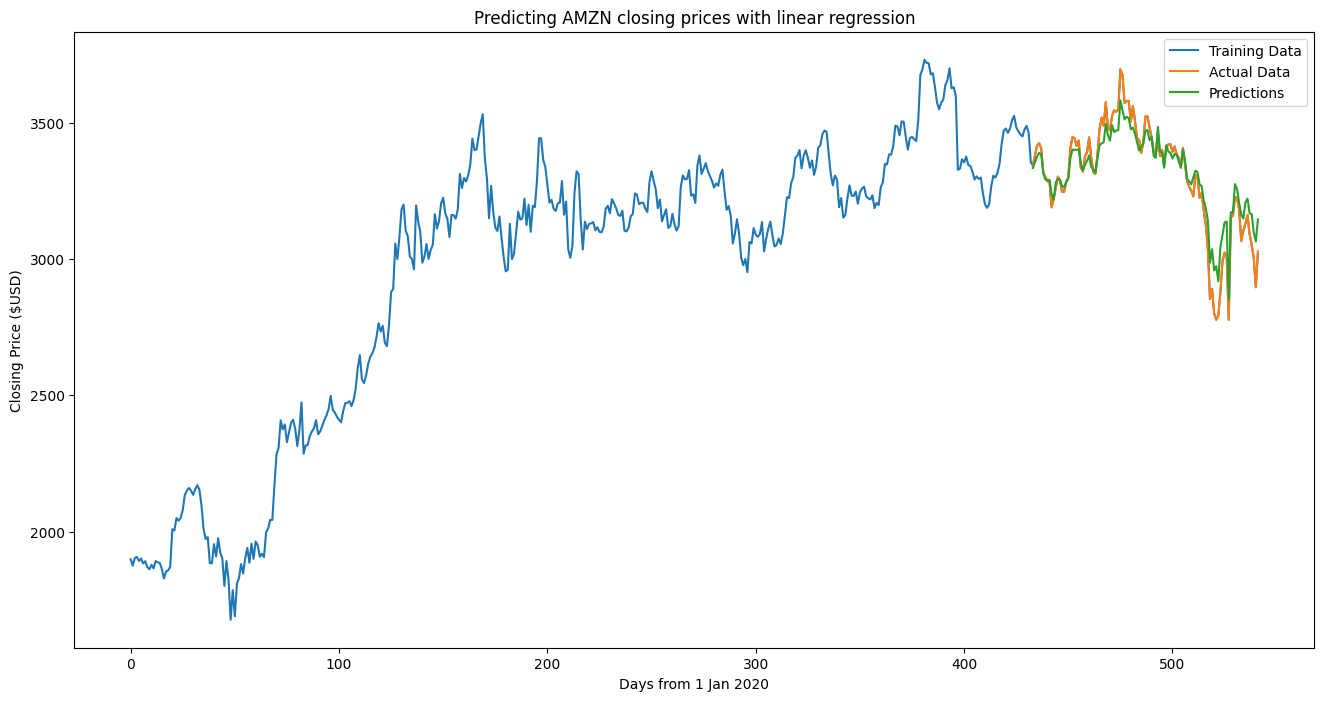

In [63]:
# visualising the predictive ability of the linear regression model on AMZN future closing prices
plt.figure(figsize=[16,8])

plt.plot(amzn_df['close'])

amzn_model_plot = amzn_df[433:].copy()
amzn_model_plot['predict'] = amzn_model.predict(amzn_model_plot.drop(columns = 'target'))
plt.plot(amzn_model_plot[['close', 'predict']])

plt.legend(['Training Data', 'Actual Data', "Predictions"])
plt.xlabel('Days from 1 Jan 2020')
plt.ylabel('Closing Price ($USD)')
plt.title('Predicting AMZN closing prices with linear regression')

## Part 3: META

In [64]:
# preparing the META data set
meta = df.loc[df['symbol'] == "META"]

meta_df = meta[['close','high','low','open','volume']]

meta_df['target'] = meta_df['close'].shift(-25)

meta_df.dropna(axis=0,inplace=True)

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_11533/2413198534.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_df['target'] = meta_df['close'].shift(-25)
/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_11533/2413198534.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_df.dropna(axis=0,inplace=True)


In [65]:
# defining the predictor (x) and outcome (y) variables
meta_x = meta_df.drop('target', axis=1).copy()
meta_y = meta_df['target'].copy()

# splitting the META dataset into training and testing data sets
meta_x_train, meta_x_test, meta_y_train, meta_y_test  = train_test_split(meta_x, meta_y, test_size = 0.2)

# inspecting the number of rows and columns of the META training and testing data sets
print("The shape of the training and testing data sets are as follows:\nmeta_x_train: {}\nmeta_x_test: {}\nmeta_y_train: {}\nmeta_y_test: {} \n".format(meta_x_train.shape, meta_x_test.shape, meta_y_train.shape, meta_y_test.shape))

print("There are {} rows and {} columns in the META training data set.\nThere are {} rows and {} columns in the META testing data set.".format(meta_y_train.shape[0], meta_x_train.shape[1], meta_y_test.shape[0], meta_x_test.shape[1]))

The shape of the training and testing data sets are as follows:
meta_x_train: (433, 5)
meta_x_test: (109, 5)
meta_y_train: (433,)
meta_y_test: (109,) 

There are 433 rows and 5 columns in the META training data set.
There are 109 rows and 5 columns in the META testing data set.


In [66]:
# building the META linear regression model
meta_model = LinearRegression()
meta_model.fit(meta_x_train, meta_y_train)

# predicting META future closing prices based on the model
meta_model_prediction = meta_model.predict(meta_x_test)
print("The actual verses predicted values of META future 25 day closing prices:")
pd.DataFrame({'Actual values':np.array(meta_y_test), 'Predicted values':np.array(meta_model_prediction)})

The actual verses predicted values of META future 25 day closing prices:


,Actual values,Predicted values
0,276.97,280.657509
1,275.00,276.713499
2,328.73,297.412885
3,267.40,276.923228
4,262.34,241.435531
...,...,...
104,301.47,278.250664
105,271.87,268.182638
106,208.47,185.891272
107,330.45,333.289401


In [67]:
# evaluating META linear regression model performance
meta_model_r2 = abs(meta_model.score(meta_x_test,meta_y_test)*100)
print('The r^2 of the META linear regression model is: ', meta_model_r2.round(2), '%')

The r^2 of the META linear regression model is:  58.81 %


Text(0.5, 1.0, 'Predicting META closing prices with linear regression')

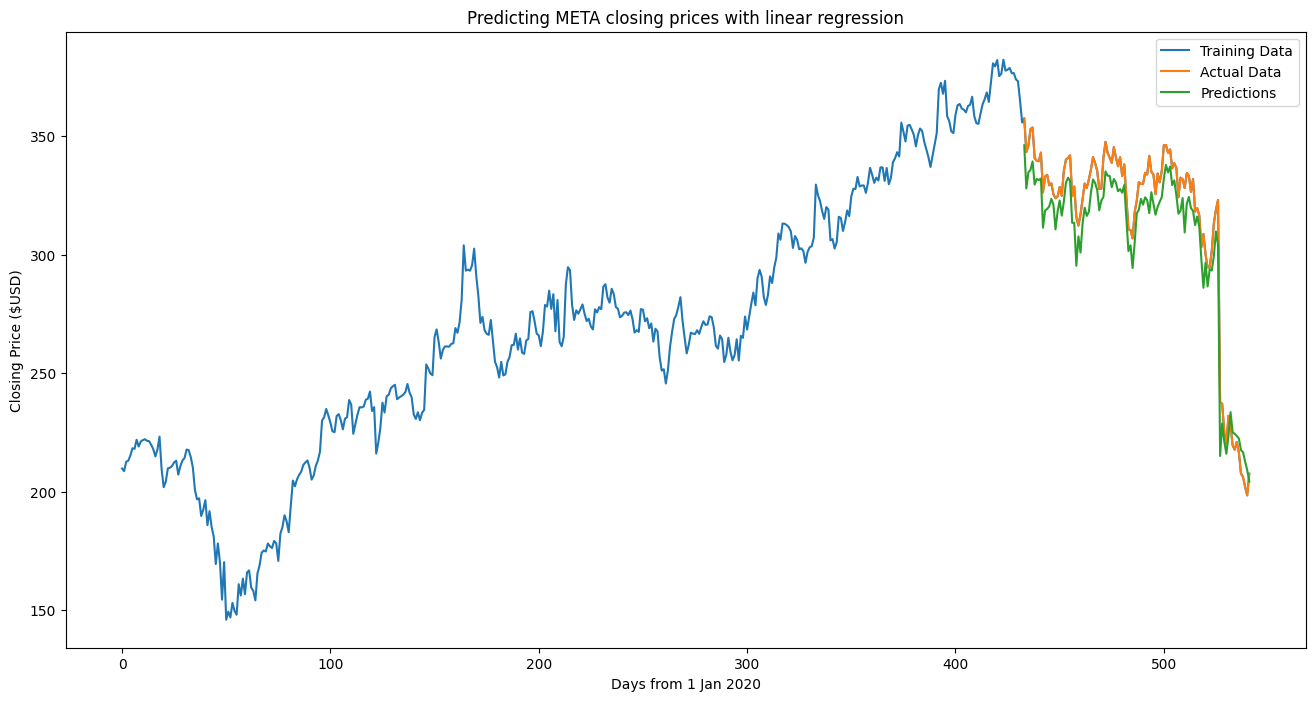

In [69]:
# visualising the predictive ability of the linear regression model on META future closing prices
plt.figure(figsize=[16,8])

plt.plot(meta_df['close'])

meta_model_plot = meta_df[433:].copy()
meta_model_plot['predict'] = meta_model.predict(meta_model_plot.drop(columns = 'target'))
plt.plot(meta_model_plot[['close', 'predict']])

plt.legend(['Training Data', 'Actual Data', "Predictions"])
plt.xlabel('Days from 1 Jan 2020')
plt.ylabel('Closing Price ($USD)')
plt.title('Predicting META closing prices with linear regression')

## Part 4: AAPL

In [ ]:
# preparing the AAPL data set
aapl = df.loc[df['symbol'] == "AAPL"]

aapl_df = aapl[['close','high','low','open','volume']]

aapl_df['target'] = aapl_df['close'].shift(-25)

aapl_df.dropna(axis=0,inplace=True)

aapl_df.reset_index(inplace=True)

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_11533/4122108410.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_df['target'] = aapl_df['close'].shift(-25)
/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_11533/4122108410.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_df.dropna(axis=0,inplace=True)


In [ ]:
# defining the predictor (x) and outcome (y) variables
aapl_x = aapl_df.drop('target', axis=1).copy()
aapl_y = aapl_df['target'].copy()

# splitting the AAPL dataset into training and testing data sets
aapl_x_train, aapl_x_test, aapl_y_train, aapl_y_test  = train_test_split(aapl_x, aapl_y, test_size = 0.2)

# inspecting the number of rows and columns of the AAPL training and testing data sets
print("The shape of the training and testing data sets are as follows:\naapl_x_train: {}\naapl_x_test: {}\naapl_y_train: {}\naapl_y_test: {} \n".format(aapl_x_train.shape, aapl_x_test.shape, aapl_y_train.shape, aapl_y_test.shape))

print("There are {} rows and {} columns in the AAPL training data set.\nThere are {} rows and {} columns in the AAPL testing data set.".format(aapl_y_train.shape[0], aapl_x_train.shape[1], aapl_y_test.shape[0], aapl_x_test.shape[1]))

The shape of the training and testing data sets are as follows:
aapl_x_train: (433, 6)
aapl_x_test: (109, 6)
aapl_y_train: (433,)
aapl_y_test: (109,) 

There are 433 rows and 6 columns in the AAPL training data set.
There are 109 rows and 6 columns in the AAPL testing data set.


In [ ]:
# building the AAPL linear regression model
aapl_model = LinearRegression()
aapl_model.fit(aapl_x_train, aapl_y_train)

# predicting future AAPL closing prices based on the model
aapl_model_prediction = aapl_model.predict(aapl_x_test)
print("The actual verses predicted values of AAPL future 25 day closing prices:")
pd.DataFrame({'Actual values':np.array(aapl_y_test), 'Predicted values':np.array(aapl_model_prediction)})

The actual verses predicted values of AAPL future 25 day closing prices:


,Actual values,Predicted values
0,455.61,271.126397
1,162.41,123.366256
2,118.03,129.502551
3,506.09,283.928896
4,130.84,153.186361
...,...,...
104,358.87,264.857540
105,121.21,159.104890
106,460.04,276.162805
107,127.14,162.697055


In [ ]:
# evaluating the AAPL linear regression model performance
aapl_model_r2 = abs(aapl_model.score(aapl_x_test,aapl_y_test)*100)
print('The r2 of the linear regression model is: ', aapl_model_r2.round(2), '%')

The r2 of the linear regression model is:  58.94 %


Text(0.5, 1.0, 'Predicting AAPL closing prices with linear regression')

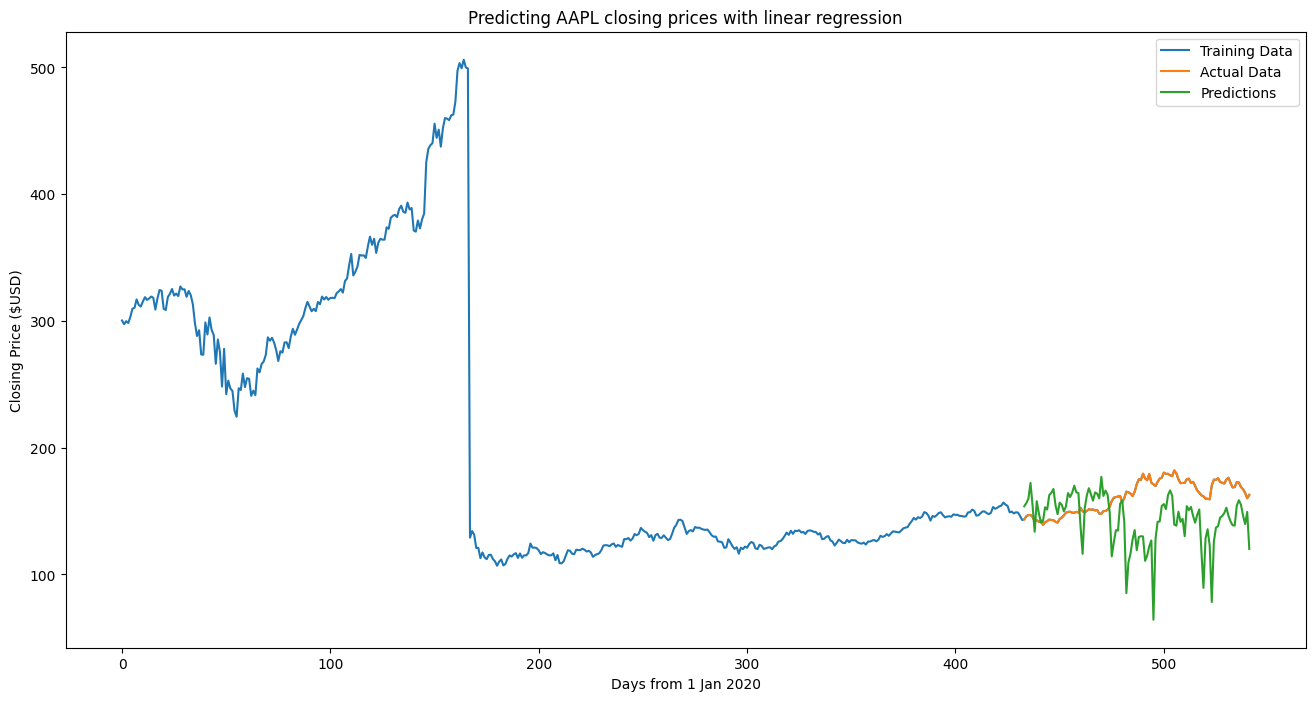

In [ ]:
# visualising the predictive ability of the linear regression model on AAPL future closing prices
plt.figure(figsize=[16,8])

plt.plot(aapl_df['close'])

aapl_model_plot = aapl_df[433:].copy()
aapl_model_plot['predict'] = aapl_model.predict(aapl_model_plot.drop(columns = 'target'))
plt.plot(aapl_model_plot[['close', 'predict']])

plt.legend(['Training Data', 'Actual Data', "Predictions"])
plt.xlabel('Days from 1 Jan 2020')
plt.ylabel('Closing Price ($USD)')
plt.title('Predicting AAPL closing prices with linear regression')